In [39]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.datasets import load_digits 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
from sklearn import tree 
from sklearn.ensemble import BaggingClassifier 
from sklearn.model_selection import train_test_split 
from math import *
from sklearn.model_selection import GridSearchCV

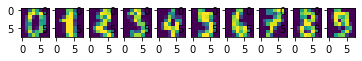

0.7033374536464772


In [56]:

digits = load_digits() 
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5) 
# Affichage des 10 premières images 
fig = plt.figure() 
for i, digit in enumerate(digits.images[:10]): 
    fig.add_subplot(1,10,i+1) 
    plt.imshow(digit) 
plt.show()


from sklearn.model_selection import train_test_split 
# 90% des données pour le test, 10% pour l'apprentissage 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90) 
 
clf = tree.DecisionTreeClassifier() 
clf.fit(X_train, y_train) 
 
Z = clf.predict(X_test) 
accuracy = clf.score(X_test,y_test) 
print(accuracy) 

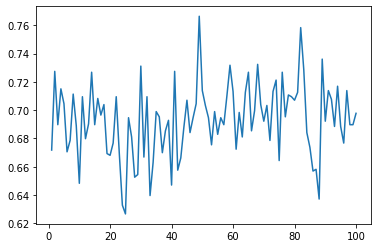

Moyenne DecisionTreeClassifier =  0.6930902348578495 
 écart type DecisionTreeClassifier =  0.025677033487644784


In [52]:
X, y = digits.data, digits.target 
accuracy = []
N = 100
for i in range (N) :
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90) 
    clf = tree.DecisionTreeClassifier() 
    clf.fit(X_train, y_train) 
    Z = clf.predict(X_test) 
    accuracy.append(clf.score(X_test,y_test) )
    
plt.plot([(i+1) for i in range(N)], accuracy)
plt.show()

print("Moyenne DecisionTreeClassifier = ", np.mean(accuracy), "\n", "écart type DecisionTreeClassifier = ",np.std(accuracy))


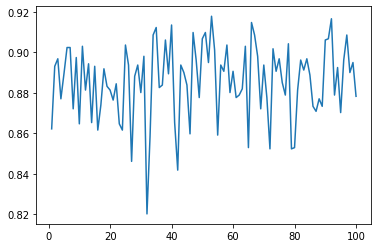

Moyenne BaggingClassifier =  0.885778739184178 
 écart type BaggingClassifier =  0.018233264523872514


In [42]:
N = 100
accuracy = []
        
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)
    
    clf = BaggingClassifier(BaggingClassifier(tree.DecisionTreeClassifier(),  max_samples=0.5, max_features=0.5, n_estimators=200) )
    
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    
    accuracy.append(clf.score(X_test,y_test))
        

plt.plot([(i+1) for i in range(N)], accuracy)
plt.show()

print("Moyenne BaggingClassifier = ", np.mean(accuracy), "\n","écart type BaggingClassifier = ",np.std(accuracy))


In [43]:
pgrid = {
    "max_samples": [0.2, 0.4, 0.6, 0.8],
    "max_features": [0.2, 0.4, 0.6, 0.8]
}
grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))

Meilleur score : 0.7867737948084055
max_samples: 0.8
max_features: 0.6


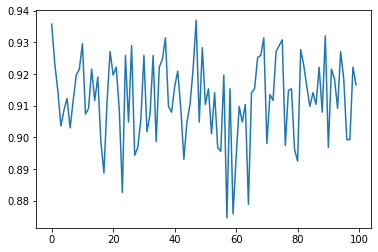

Moyenne RandomForestClassifier =  0.9121260815822003 
 écart type RandomForestClassifier =  0.013070891278019216


In [44]:
from sklearn.ensemble import RandomForestClassifier


digits = load_digits() 
X, y = digits.data, digits.target 
 
N = 100
accuracy = []
        
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90) 
    
    clf = RandomForestClassifier(n_estimators=200) 
    clf.fit(X_train, y_train) 
    y_pred = clf.predict(X_test) 
    accuracy.append(clf.score(X_test,y_test) )

plt.plot([i for i in range(N)], accuracy)
plt.show()

print("Moyenne RandomForestClassifier = ", np.mean(accuracy), "\n", "écart type RandomForestClassifier = ",np.std(accuracy))


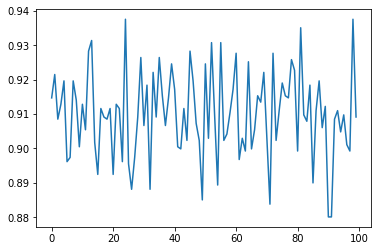

Moyenne AdaBoostClassifier =  0.9099876390605687 
 écart type AdaBoostClassifier =  0.012542401053157324


In [45]:
from sklearn.ensemble import AdaBoostClassifier

digits = load_digits()
X, y = digits.data, digits.target

N = 100
accuracy = []
for i in range(N):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# AdaBoost basé sur 200 arbres de décision
  clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=5), n_estimators=200, learning_rate=2)
  clf.fit(X_train, y_train)
  accuracy.append(clf.score(X_test, y_test))

plt.plot([i for i in range(N)], accuracy)
plt.show()

print("Moyenne AdaBoostClassifier = ", np.mean(accuracy), "\n", "écart type AdaBoostClassifier = ",np.std(accuracy))


In [46]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Arbre de décision : " + str(clf.score(X_test,y_test)))
        
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Bagging (200 arbres) : " + str(clf.score(X_test,y_test)))
        
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Forêt aléatoire (200 arbres) : " + str(clf.score(X_test,y_test)))

Arbre de décision : 0.673053152039555
Bagging (200 arbres) : 0.8838071693448702
Forêt aléatoire (200 arbres) : 0.9134734239802225


In [47]:
 N = 10
        
bagging_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=30)
    clf.fit(X_train, y_train)
    bagging_accuracies.append(clf.score(X_test,y_test))
        
print(np.mean(bagging_accuracies), np.std(bagging_accuracies))
        
        
rf_accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    clf = RandomForestClassifier(n_estimators=30)
    clf.fit(X_train, y_train)
    rf_accuracies.append(clf.score(X_test,y_test))
        
print(np.mean(rf_accuracies), np.std(rf_accuracies))

0.9350389321468298 0.01144366731889805
0.9611790878754171 0.007043010508688212


In [48]:
from sklearn.ensemble import ExtraTreesClassifier
        
import numpy as np
digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=0)
        
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy=clf.score(X_test,y_test)
print("Forêt aléatoire : " + str(accuracy))
        
clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test,y_test)
print("Extra Trees : " + str(accuracy))

Forêt aléatoire : 0.9577308120133482
Extra Trees : 0.9744160177975528


In [49]:
from sklearn.ensemble import AdaBoostClassifier

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

    # AdaBoost basÃ© sur 200 arbres de dÃ©cision
clf = AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=15), n_estimators=200, learning_rate=.52)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)


0.646477132262052
